In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# S&P 100 Case Study

In [3]:
df = pd.read_csv('/Financial-Analysis/Datasets/sector.txt')
df

,Name,Sector,Price,EPS
0,Apple Inc,Information Technology,170.12,9.20
1,Abbvie Inc,Health Care,93.29,5.31
2,Abbott Laboratories,Health Care,55.28,2.41
3,Accenture Plc,Information Technology,145.30,5.91
4,Allergan Plc,Health Care,171.81,15.42
...,...,...,...,...
97,Verizon Communications Inc,Telecommunications,45.85,3.75
98,Walgreens Boots Alliance,Consumer Staples,70.25,5.10
99,Wells Fargo & Company,Financials,54.02,4.14
100,Wal-Mart Stores,Consumer Staples,96.08,4.36


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    102 non-null    object 
 1   Sector  102 non-null    object 
 2   Price   102 non-null    float64
 3   EPS     102 non-null    float64
dtypes: float64(2), object(2)
memory usage: 3.3+ KB


In [17]:
df.describe()

,Price,EPS
count,102.000000,102.000000
mean,150.500686,6.485294
std,240.768463,8.577741
min,12.110000,0.020000
25%,54.335000,2.885000
50%,88.295000,4.405000
75%,151.032500,6.565000
max,1762.230000,74.450000


In [14]:
df['Sector'].value_counts(normalize=True) * 100

Consumer Discretionary    15.686275
Information Technology    14.705882
Health Care               14.705882
Financials                14.705882
Industrials               12.745098
Consumer Staples          11.764706
Energy                     6.862745
Utilities                  3.921569
Materials                  1.960784
Telecommunications         1.960784
Real Estate                0.980392
Name: Sector, dtype: float64

### Exploring EPS
* EPS is an important metric for investors because it gives them an idea of how much profit a company is making per share of stock.
* EPS can be used to compare a company's profitability to other companies in the same industry or sector.
* A higher EPS is generally viewed as a positive indicator for investors, as it suggests that the company is generating more profit per share.

In [26]:
# mean eps by sector.
df.groupby('Sector')['EPS'].mean().to_frame().sort_values(by='EPS',ascending=False)

,EPS
Sector,
Consumer Discretionary,8.283750
Information Technology,8.134000
Health Care,7.470000
Industrials,7.349231
Financials,6.854000
Real Estate,6.050000
Materials,4.595000
Utilities,4.087500
Consumer Staples,4.009167


In [52]:
eps_sectors = df.groupby('Sector')['EPS'].mean().to_frame().sort_values(by='EPS',ascending=False)

In [66]:
df.merge(eps_sectors, on='Sector', suffixes=('', ' Sector Mean'))

,Name,Sector,Price,EPS,EPS Sector Mean
0,Apple Inc,Information Technology,170.12,9.20,8.134
1,Accenture Plc,Information Technology,145.30,5.91,8.134
2,Cisco Systems Inc,Information Technology,36.38,2.17,8.134
3,Facebook Inc,Information Technology,179.14,5.19,8.134
4,Alphabet Class C,Information Technology,1018.48,29.87,8.134
...,...,...,...,...,...
97,Dowdupont Inc.,Materials,71.12,3.66,4.595
98,Monsanto Company,Materials,118.19,5.53,4.595
99,Simon Property Group,Real Estate,159.25,6.05,6.050
100,AT&T Inc,Telecommunications,34.59,2.93,3.340


In [67]:
# getting the companies that got an eps below their industry avgS
df_eps = df.merge(eps_sectors, on='Sector', suffixes=('', ' Sector Mean'))
df_eps[df_eps['EPS'] < df_eps['EPS Sector Mean']]

,Name,Sector,Price,EPS,EPS Sector Mean
1,Accenture Plc,Information Technology,145.30,5.91,8.134000
2,Cisco Systems Inc,Information Technology,36.38,2.17,8.134000
3,Facebook Inc,Information Technology,179.14,5.19,8.134000
7,Intel Corp,Information Technology,44.88,3.18,8.134000
8,Mastercard Inc,Information Technology,149.93,4.31,8.134000
...,...,...,...,...,...
91,Schlumberger N.V.,Energy,61.53,1.29,1.452857
94,Exelon Corp,Utilities,41.32,2.48,4.087500
96,Southern Company,Utilities,51.12,2.75,4.087500
97,Dowdupont Inc.,Materials,71.12,3.66,4.595000


In [73]:
df_eps.nlargest(10, 'EPS')

,Name,Sector,Price,EPS,EPS Sector Mean
57,Priceline Group,Consumer Discretionary,1762.23,74.45,8.283750
4,Alphabet Class C,Information Technology,1018.48,29.87,8.134000
5,Alphabet Class A,Information Technology,1034.09,29.87,8.134000
19,Biogen Inc,Health Care,311.92,21.59,7.470000
35,Blackrock,Financials,474.05,21.55,6.854000
39,Goldman Sachs Group,Financials,238.05,19.20,6.854000
17,Allergan Plc,Health Care,171.81,15.42,7.470000
6,International Business Machines,Information Technology,151.40,13.66,8.134000
68,Lockheed Martin Corp,Industrials,312.93,12.72,7.349231
18,Amgen,Health Care,168.93,12.58,7.470000


In [72]:
df_eps.nsmallest(5, 'EPS')


,Name,Sector,Price,EPS,EPS Sector Mean
86,Conocophillips,Energy,49.89,0.02,1.452857
90,Occidental Petroleum Corp,Energy,68.17,0.35,1.452857
89,Kinder Morgan,Energy,17.04,0.65,1.452857
88,Halliburton Company,Energy,41.57,0.73,1.452857
66,General Electric Company,Industrials,17.91,1.24,7.349231


In [68]:
# finding how many companies have an eps below avg
below_mean = df_eps[df_eps['EPS'] < df_eps['EPS Sector Mean']]
below_mean['Sector'].value_counts()


Consumer Discretionary    15
Information Technology    11
Financials                11
Health Care               10
Industrials                7
Consumer Staples           6
Energy                     5
Utilities                  2
Materials                  1
Telecommunications         1
Name: Sector, dtype: int64

In [69]:
df['Sector'].value_counts()

Consumer Discretionary    16
Information Technology    15
Health Care               15
Financials                15
Industrials               13
Consumer Staples          12
Energy                     7
Utilities                  4
Materials                  2
Telecommunications         2
Real Estate                1
Name: Sector, dtype: int64

Based on this info almost all the consumer discretionary companies have an eps below avg. 
This might be because theres outliers in the data that skw the mean.

In [50]:
# df[df['Sector'].isin(['Consumer Discretionary', 'Information Technology', 'Health Care'])]

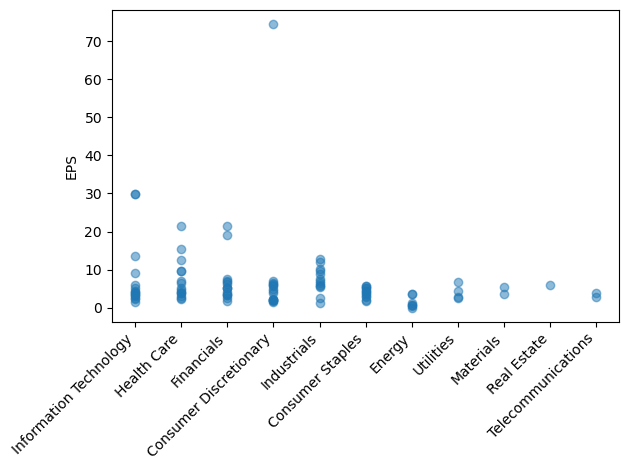

In [45]:
plt.scatter(df['Sector'], df['EPS'], alpha=0.5)
plt.ylabel('EPS')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

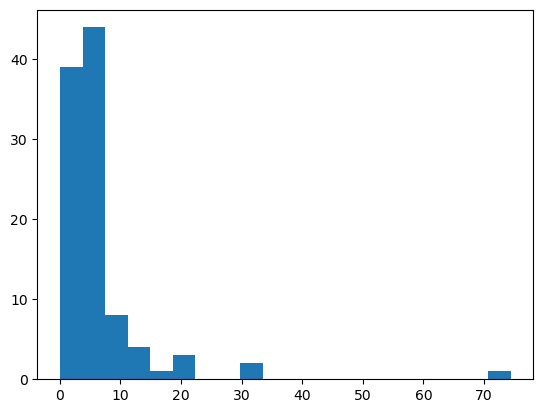

In [49]:
plt.hist(df['EPS'], bins=20)
plt.show()

In [48]:
df[df['Sector'] == 'Consumer Discretionary'].min(), 

(Name      21st Centry Fox Class A
 Sector     Consumer Discretionary
 Price                       12.11
 EPS                          1.61
 dtype: object,)

In [47]:
df[df['Sector'] == 'Consumer Discretionary'].max()  


Name         Walt Disney Company
Sector    Consumer Discretionary
Price                    1762.23
EPS                        74.45
dtype: object

Based on the scatter plot, we can clearly see that there are some outliers on the eps data.